# **This work has covered the following areas:**

*   Data abstraction
*   Data type and attributes
*   Data analysis
*   Data visualizations for increment one

**Uploading the CSV dataset**

In [14]:
from google.colab import files
 
 
uploaded = files.upload()

Saving toddler_autism.csv to toddler_autism.csv


**Importing necessary modules**

In [24]:
#Getting important libraries for the project
import numpy as np
import pandas as pd
import io
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
#xgboost assists in achieving high accuracy on predictions.
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Loading our dataset
df = pd.read_csv(io.BytesIO(uploaded['toddler_autism.csv']))
print(df)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1                  4   m  White Europ

In [161]:
print(df.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1     

In [162]:
print(df.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [163]:
#Checking Size of the dataset
print(df.shape)

(1054, 19)


**Dataset info display**

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [165]:
#Getting dataset'sstatistical measures
print(df.describe().T)

                 count        mean         std   min     25%    50%     75%  \
Case_No         1054.0  527.500000  304.407895   1.0  264.25  527.5  790.75   
A1              1054.0    0.563567    0.496178   0.0    0.00    1.0    1.00   
A2              1054.0    0.448767    0.497604   0.0    0.00    0.0    1.00   
A3              1054.0    0.401328    0.490400   0.0    0.00    0.0    1.00   
A4              1054.0    0.512334    0.500085   0.0    0.00    1.0    1.00   
A5              1054.0    0.524668    0.499628   0.0    0.00    1.0    1.00   
A6              1054.0    0.576850    0.494293   0.0    0.00    1.0    1.00   
A7              1054.0    0.649905    0.477226   0.0    0.00    1.0    1.00   
A8              1054.0    0.459203    0.498569   0.0    0.00    0.0    1.00   
A9              1054.0    0.489564    0.500128   0.0    0.00    0.0    1.00   
A10             1054.0    0.586338    0.492723   0.0    0.00    1.0    1.00   
Age_Mons        1054.0   27.867173    7.980354  12.0

In [166]:
#Data transformation
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})
df = df.replace({'Yes':1, 'No':0, '?':'Others', 'others':'Others'})
#Checking to see if changes happened to the dataset
print(df.head(5))


   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity  Jaundice  Family_mem_with_ASD Who completed the test  \
0   f  middle eastern         1                    0          family member   
1   m  White European         1                    0          family member   
2   m  middle eastern         1                    0          family member   
3   m        Hispanic         0                    0          family member   
4   f  White European         0                    1          family member   

   Class/ASD Traits   
0              

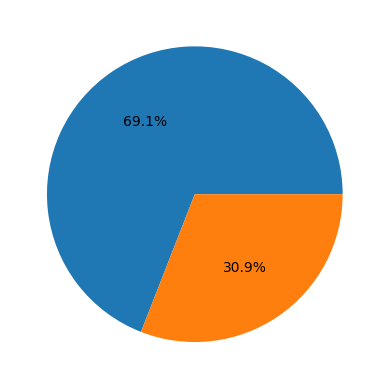

In [167]:
#Plotting a pie chart of the dataset to check the imbalances
plt.pie(df['Class/ASD Traits '].value_counts().values, autopct='%1.1f%%')
plt.show()

**Listing dataset columns before changes**

In [168]:
for col in df.columns:
    print(col)

Case_No
A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
Age_Mons
Qchat-10-Score
Sex
Ethnicity
Jaundice
Family_mem_with_ASD
Who completed the test
Class/ASD Traits 


**Renaming of columns in order to operate easily**

In [169]:
df.rename(columns={"A1": "call_response"}, inplace=True)
df.rename(columns={"A2": "eye_contact"}, inplace=True)
df.rename(columns={"A3": "point_to_get"}, inplace=True)
df.rename(columns={"A4": "point_to_share"}, inplace=True)
df.rename(columns={"A5": "pretend"}, inplace=True)
df.rename(columns={"A6": "follow_sight"}, inplace=True)
df.rename(columns={"A7": "show_care"}, inplace=True)
df.rename(columns={"A8": "child_first_words"}, inplace=True)
df.rename(columns={"A9": "show_simple_gestures"}, inplace=True)
df.rename(columns={"A10": "stare_at_nothing"}, inplace=True)

**Drop the first column**

**Listing dataset columns after changes**

In [170]:
for col in df.columns:
    print(col)

Case_No
call_response
eye_contact
point_to_get
point_to_share
pretend
follow_sight
show_care
child_first_words
show_simple_gestures
stare_at_nothing
Age_Mons
Qchat-10-Score
Sex
Ethnicity
Jaundice
Family_mem_with_ASD
Who completed the test
Class/ASD Traits 


**Below is the index attribute to display the row labels of our data frame object.**

In [171]:
df.index

RangeIndex(start=0, stop=1054, step=1)

**Getting the dataset data types**

In [172]:
df.dtypes

Case_No                    int64
call_response              int64
eye_contact                int64
point_to_get               int64
point_to_share             int64
pretend                    int64
follow_sight               int64
show_care                  int64
child_first_words          int64
show_simple_gestures       int64
stare_at_nothing           int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                   int64
Family_mem_with_ASD        int64
Who completed the test    object
Class/ASD Traits           int64
dtype: object

**Checking for nulls**

In [173]:
df.isna()

,Case_No,call_response,eye_contact,point_to_get,point_to_share,pretend,follow_sight,show_care,child_first_words,show_simple_gestures,stare_at_nothing,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1051,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1052,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Calculating the sum of missing values**

In [174]:
df.isna().sum()

Case_No                   0
call_response             0
eye_contact               0
point_to_get              0
point_to_share            0
pretend                   0
follow_sight              0
show_care                 0
child_first_words         0
show_simple_gestures      0
stare_at_nothing          0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

**Analysing the dataset**

In [175]:
df['call_response'].value_counts()[0]

460

In [176]:
df['call_response'].value_counts()[1]

594

In [177]:
df['eye_contact'].value_counts()[0]

581

In [178]:
df['point_to_get'].value_counts()[0]

631

In [180]:
df['point_to_get'].value_counts()[1]

423

In [181]:
df['point_to_share'].value_counts()[0]

514

In [182]:
df['point_to_share'].value_counts()[1]

540

In [183]:
df['pretend'].value_counts()[0]

501

In [184]:
df['pretend'].value_counts()[1]

553

In [185]:
df['follow_sight'].value_counts()[0]

446

In [186]:
df['follow_sight'].value_counts()[1]

608

In [187]:
df['show_care'].value_counts()[0]

369

In [188]:
df['show_care'].value_counts()[1]

685

In [189]:
df['child_first_words'].value_counts()[0]

570

In [190]:
df['child_first_words'].value_counts()[1]

484

In [191]:
df['show_simple_gestures'].value_counts()[0]

538

In [192]:
df['show_simple_gestures'].value_counts()[1]

516

In [193]:
df['stare_at_nothing'].value_counts()[0]

436

In [194]:
df['stare_at_nothing'].value_counts()[1]

618

In [195]:
df['Sex'].value_counts()['f']

319

In [196]:
df['Sex'].value_counts()['m']

735

In [197]:
df['Jaundice'].value_counts()

0    766
1    288
Name: Jaundice, dtype: int64

In [198]:
df['Ethnicity'].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [199]:
df['Family_mem_with_ASD'].value_counts()

0    884
1    170
Name: Family_mem_with_ASD, dtype: int64

**Get average of Age in months**

In [200]:
df["Age_Mons"].mean()

27.86717267552182

**Get average of Qchat-10-Score**

In [201]:
df["Qchat-10-Score"].mean()

5.212523719165086

**Correlation of the dataset. Rounding off for easy viewing.**

In [202]:
df.corr().round(2)

,Case_No,call_response,eye_contact,point_to_get,point_to_share,pretend,follow_sight,show_care,child_first_words,show_simple_gestures,stare_at_nothing,Age_Mons,Qchat-10-Score,Jaundice,Family_mem_with_ASD,Class/ASD Traits
Case_No,1.00,0.05,-0.00,0.08,0.07,0.06,0.04,0.09,0.02,0.07,-0.03,0.03,0.08,-0.00,-0.01,0.08
call_response,0.05,1.00,0.46,0.24,0.25,0.28,0.37,0.33,0.21,0.32,0.13,0.04,0.61,-0.01,0.05,0.50
eye_contact,-0.00,0.46,1.00,0.21,0.27,0.26,0.31,0.29,0.25,0.27,0.16,0.04,0.59,0.05,0.03,0.46
point_to_get,0.08,0.24,0.21,1.00,0.55,0.35,0.30,0.21,0.24,0.38,0.00,-0.11,0.59,-0.01,0.04,0.41
point_to_share,0.07,0.25,0.27,0.55,1.00,0.35,0.35,0.32,0.25,0.43,0.02,-0.09,0.64,0.03,-0.04,0.51
pretend,0.06,0.28,0.26,0.35,0.35,1.00,0.42,0.35,0.32,0.44,0.05,0.02,0.65,0.03,-0.02,0.56
follow_sight,0.04,0.37,0.31,0.30,0.35,0.42,1.00,0.36,0.28,0.42,0.07,0.07,0.66,-0.00,0.05,0.57
show_care,0.09,0.33,0.29,0.21,0.32,0.35,0.36,1.00,0.26,0.36,0.18,0.02,0.62,0.05,-0.02,0.56
child_first_words,0.02,0.21,0.25,0.24,0.25,0.32,0.28,0.26,1.00,0.29,0.08,0.08,0.54,0.00,-0.04,0.43
show_simple_gestures,0.07,0.32,0.27,0.38,0.43,0.44,0.42,0.36,0.29,1.00,0.03,-0.05,0.67,0.01,-0.01,0.58


In [207]:
print(integered_columns)
if 'Case_No' in integered_columns:
    integered_columns.remove('Case_No')
if 'Class/ASD Traits ' in integered_columns:
    integered_columns.remove('Class/ASD Traits ')

['call_response', 'eye_contact', 'point_to_get', 'point_to_share', 'pretend', 'follow_sight', 'show_care', 'child_first_words', 'show_simple_gestures', 'stare_at_nothing', 'Age_Mons', 'Qchat-10-Score', 'Jaundice', 'Family_mem_with_ASD']


['call_response', 'eye_contact', 'point_to_get', 'point_to_share', 'pretend', 'follow_sight', 'show_care', 'child_first_words', 'show_simple_gestures', 'stare_at_nothing', 'Age_Mons', 'Qchat-10-Score', 'Jaundice', 'Family_mem_with_ASD']


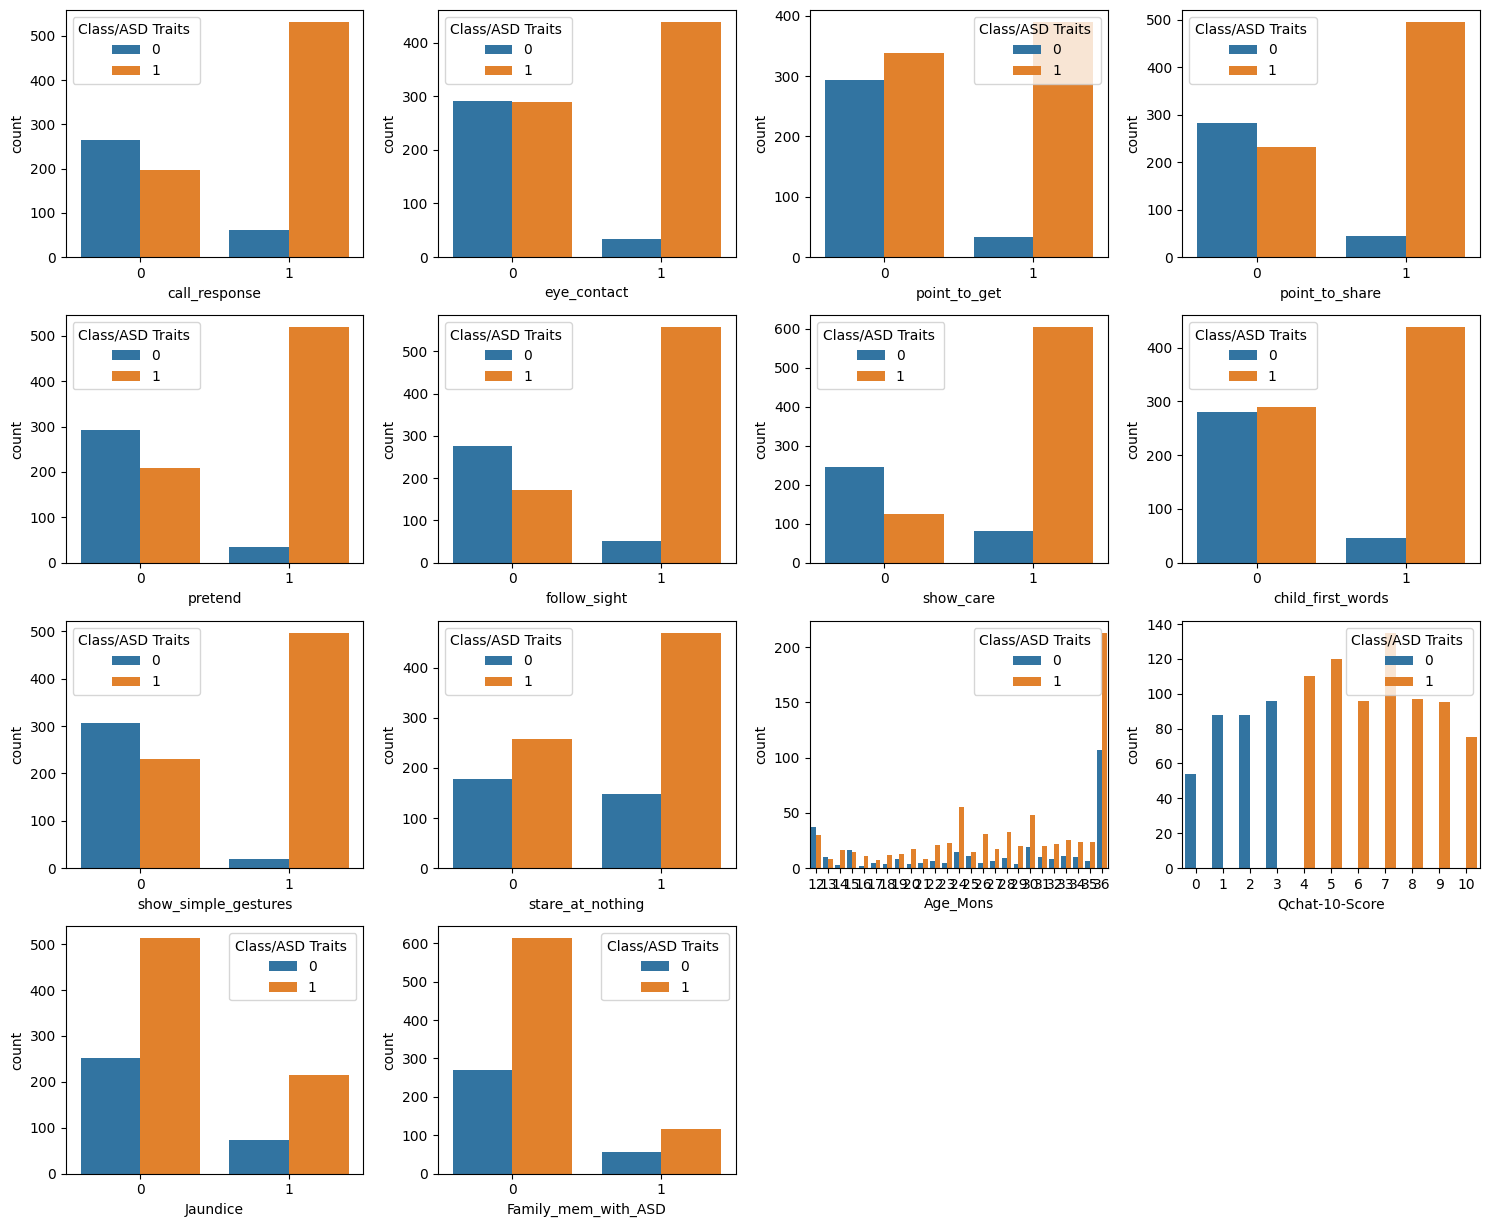

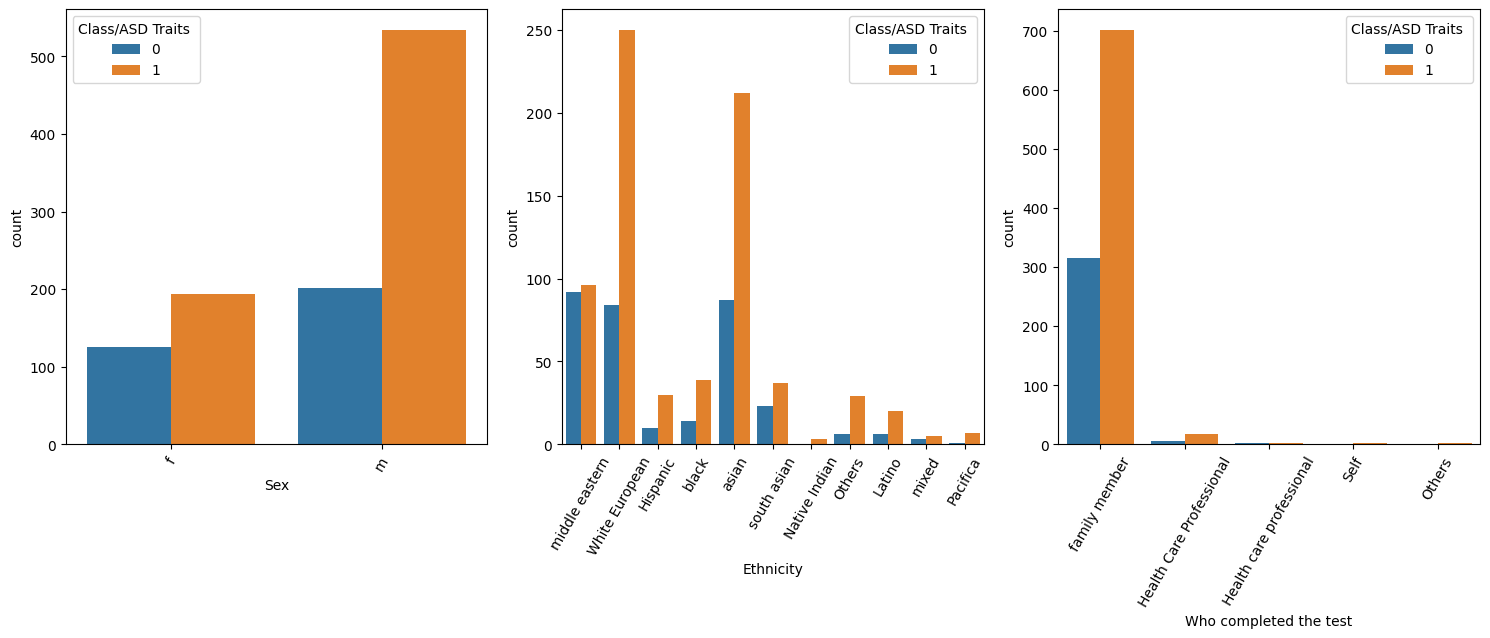

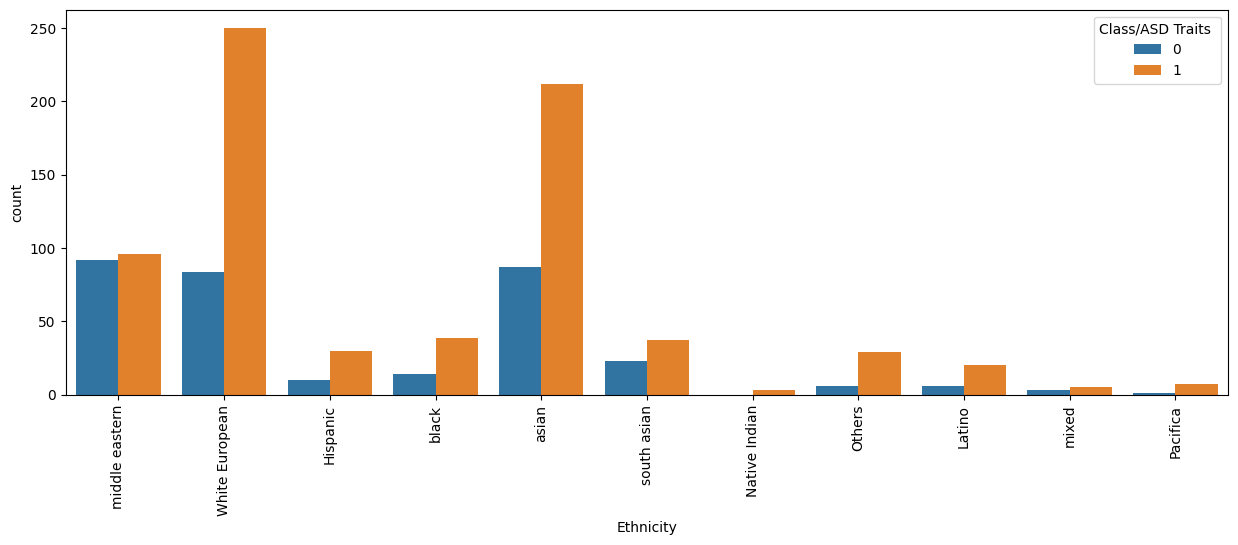

In [208]:
print(integered_columns)
#Plotting subplots. Note that we have used the last column as the hue
#There are several plots below. We are working on categorized dataset colmns
plt.subplots(figsize=(15,15))

for i, col in enumerate(integered_columns):
	plt.subplot(5,4,i+1)
	sns.countplot(x =df[col], hue = df['Class/ASD Traits '])

plt.tight_layout()
plt.show()


plt.subplots(figsize=(15, 30))

for i, col in enumerate(objected_columns):
	plt.subplot(5, 3, i+1)
	sns.countplot(x = df[col], hue=df['Class/ASD Traits '])
	plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Ethnicity', hue='Class/ASD Traits ')
plt.xticks(rotation=90)
plt.show()


In [209]:
print(df.columns)

Index(['Case_No', 'call_response', 'eye_contact', 'point_to_get',
       'point_to_share', 'pretend', 'follow_sight', 'show_care',
       'child_first_words', 'show_simple_gestures', 'stare_at_nothing',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


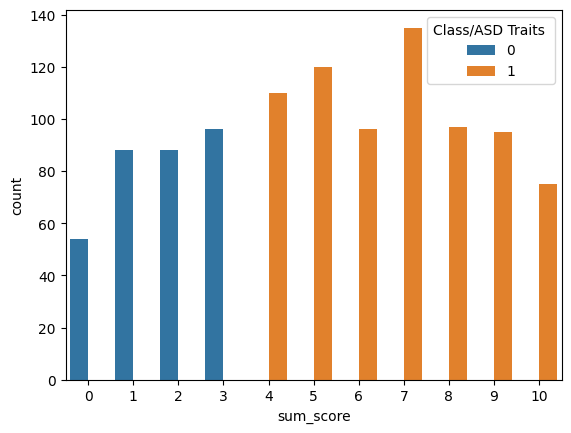

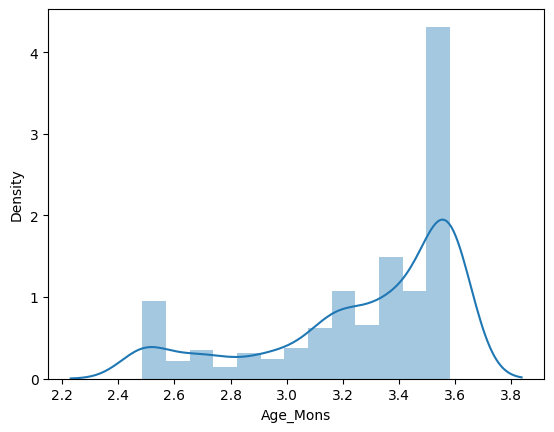

In [210]:
#A method to combine all results from A1 to A10
def add_feature(data):

	#This column we are creating will contain all the zeros
	data['sum_score'] = 0
	for col in data.loc[:,'call_response':'stare_at_nothing'].columns:

	#Updating the values with scores

		data['sum_score'] += data[col]

#Creating a random data using the two columns
	data['ind'] = data['Family_mem_with_ASD'] + data['Jaundice']

	return data

df = add_feature(df)

sns.countplot(x=df['sum_score'], hue=df['Class/ASD Traits '])
plt.show()

#Remove the skewness of the data via log transformations.
df['Age_Mons'] = df['Age_Mons'].apply(lambda x: np.log(x))

sns.distplot(df['Age_Mons'])
plt.show()

**Displaying only serious correlationship**

In [211]:
m = df.corr().round(2)
m = m.unstack()
m = m[abs(m) >= 0.6]
print(m)

Case_No               Case_No                 1.00
call_response         call_response           1.00
                      Qchat-10-Score          0.61
                      sum_score               0.61
eye_contact           eye_contact             1.00
point_to_get          point_to_get            1.00
point_to_share        point_to_share          1.00
                      Qchat-10-Score          0.64
                      sum_score               0.64
pretend               pretend                 1.00
                      Qchat-10-Score          0.65
                      sum_score               0.65
follow_sight          follow_sight            1.00
                      Qchat-10-Score          0.66
                      sum_score               0.66
show_care             show_care               1.00
                      Qchat-10-Score          0.62
                      sum_score               0.62
child_first_words     child_first_words       1.00
show_simple_gestures  show_simp

**Displaying Scatter plot using seaborn library**

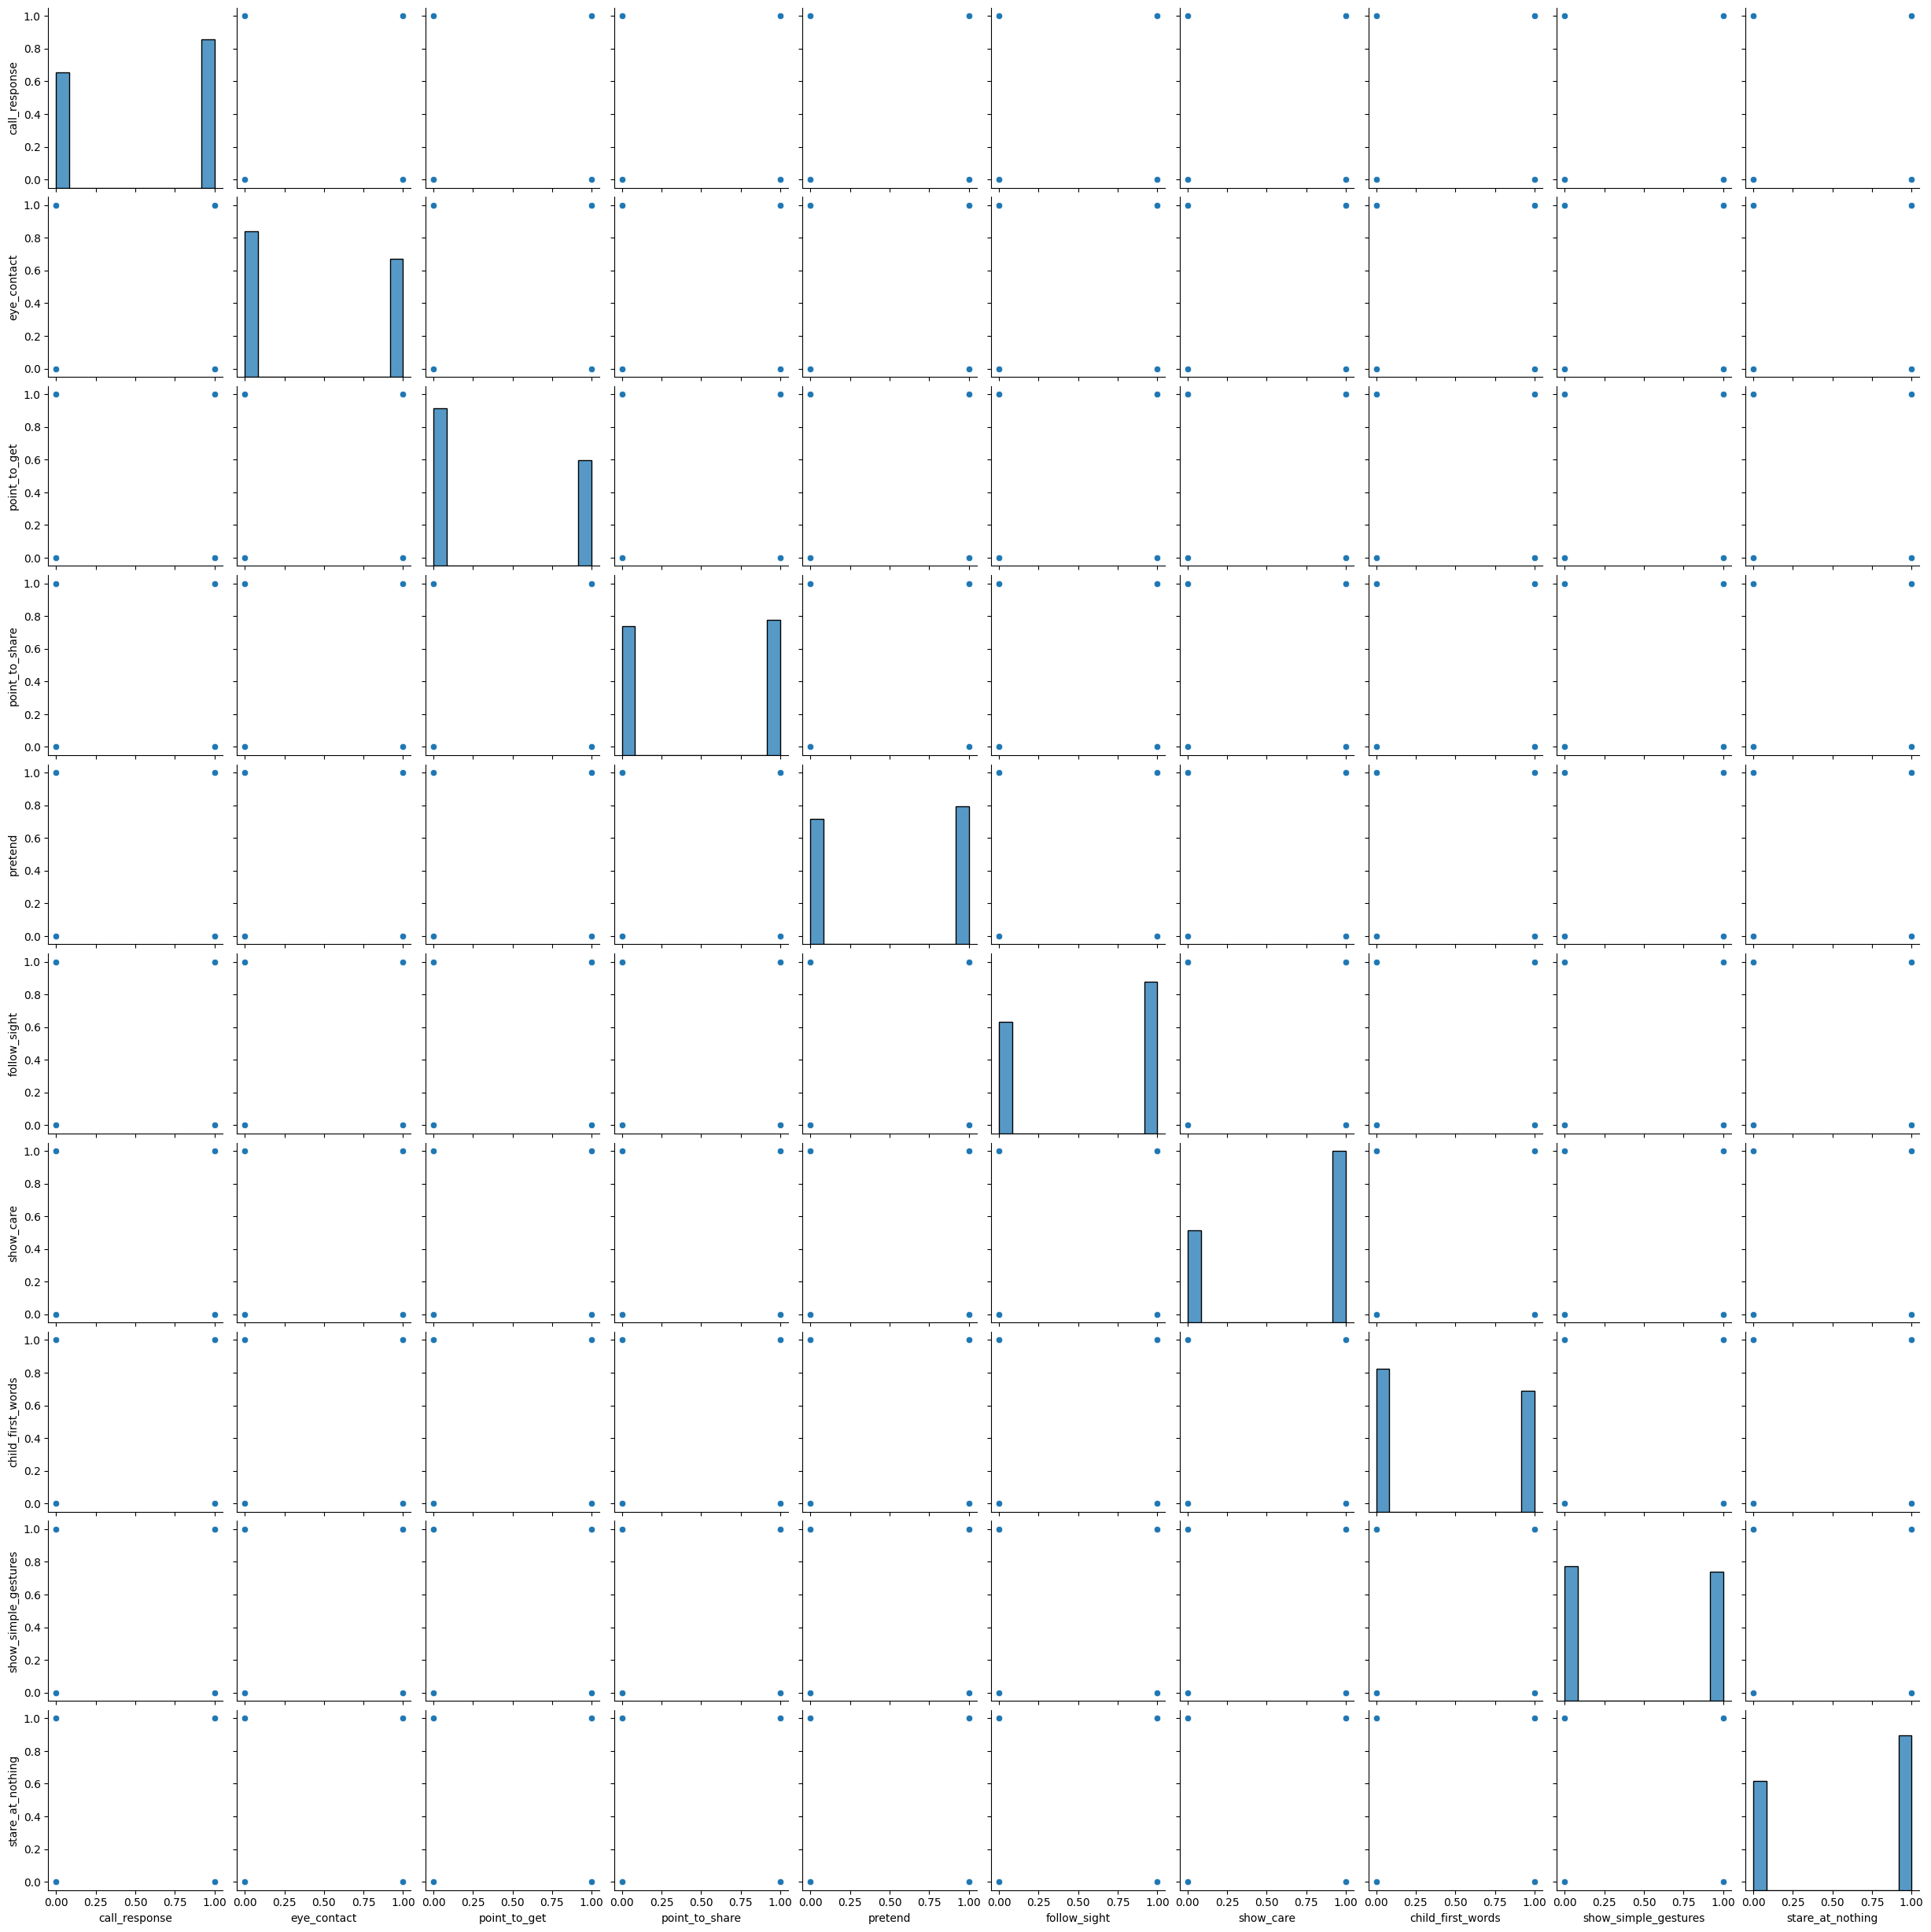

In [213]:
d = df[['call_response','eye_contact','point_to_get','point_to_share','pretend','follow_sight','show_care','child_first_words','show_simple_gestures','stare_at_nothing']]
sns.pairplot(d, kind="scatter")
plt.show()

**Displaying the scatter plot with lowess fit**

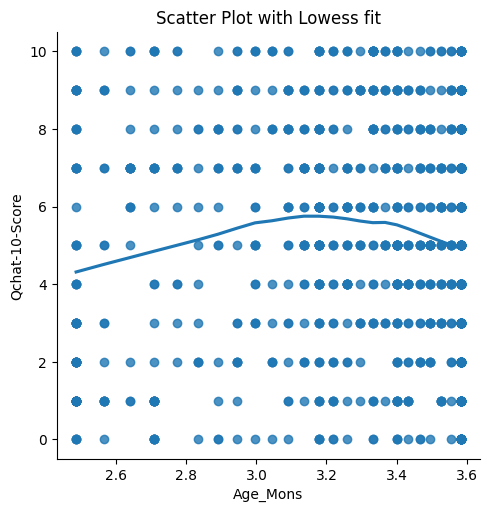

In [214]:

sns.lmplot(x= 'Age_Mons', y = 'Qchat-10-Score', data = df, lowess = True)

plt.title("Scatter Plot with Lowess fit");

**Displaying the response of child to call**

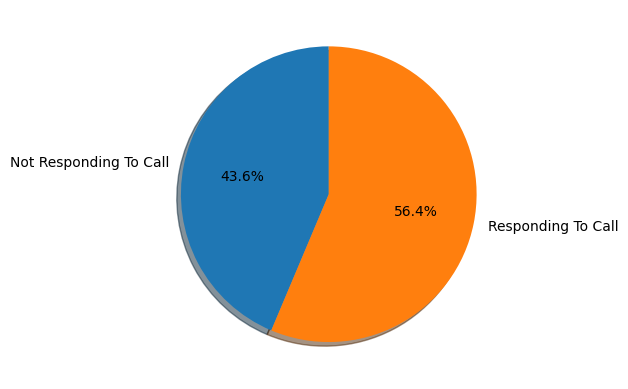

In [216]:
z = df['call_response'].value_counts()[0]
u = df['call_response'].value_counts()[1]

labels = 'Not Responding To Call', 'Responding To Call'
sizes = [z, u]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)


plt.show()

**Displaying the gender**

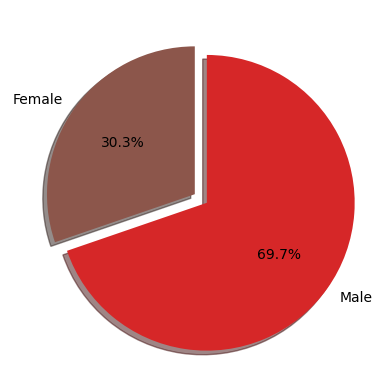

In [217]:
t = df['Sex'].value_counts()['f']
f = df['Sex'].value_counts()['m']

labels = 'Female', 'Male'
sizes = [t, f]
explode = (0, 0.1)  
colors = ["#8c564b", "#d62728"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True,explode = explode, colors = colors, startangle=90)


plt.show()

**Displaying the graph for different categories of activities**

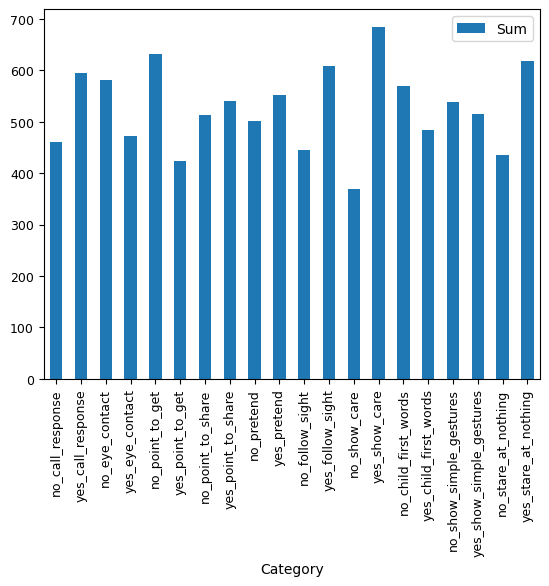

In [218]:
a = df['call_response'].value_counts()[0].sum()
b = df['eye_contact'].value_counts()[0].sum()
c=df['point_to_get'].value_counts()[0].sum()
d=df['point_to_share'].value_counts()[0].sum()
e=df['pretend'].value_counts()[0].sum()
f=df['follow_sight'].value_counts()[0].sum()
g=df['show_care'].value_counts()[0].sum()
h=df['child_first_words'].value_counts()[0].sum()
i=df['show_simple_gestures'].value_counts()[0].sum()
j=df['stare_at_nothing'].value_counts()[0].sum()

k=df['call_response'].value_counts()[1].sum()
l=df['eye_contact'].value_counts()[1].sum()
m=df['point_to_get'].value_counts()[1].sum()
n=df['point_to_share'].value_counts()[1].sum()
o=df['pretend'].value_counts()[1].sum()
p=df['follow_sight'].value_counts()[1].sum()
q=df['show_care'].value_counts()[1].sum()
r=df['child_first_words'].value_counts()[1].sum()
s=df['show_simple_gestures'].value_counts()[1].sum()
t=df['stare_at_nothing'].value_counts()[1].sum()



dfp = pd.DataFrame({'Category': ['no_call_response','yes_call_response','no_eye_contact','yes_eye_contact','no_point_to_get','yes_point_to_get','no_point_to_share','yes_point_to_share','no_pretend','yes_pretend','no_follow_sight','yes_follow_sight','no_show_care','yes_show_care','no_child_first_words','yes_child_first_words','no_show_simple_gestures','yes_show_simple_gestures','no_stare_at_nothing','yes_stare_at_nothing'], 'Sum': [a,k,b,l,c,m,d,n,e,o,f,p,g,q,h,r,i,s,j,t]})

#create bar graph
bargraph = dfp.plot.bar(x = 'Category', y = 'Sum', fontsize='9')




**Displaying the age**

<Axes: ylabel='Frequency'>

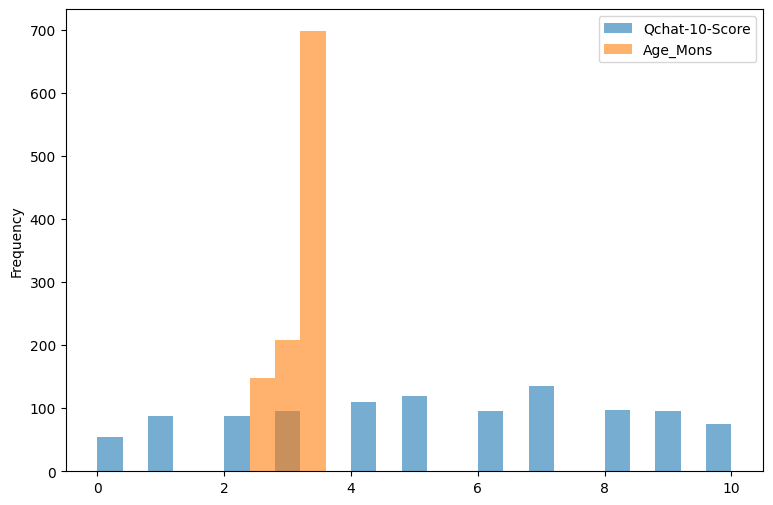

In [219]:
df[['Qchat-10-Score', 'Age_Mons']].plot(kind='hist', bins=25, alpha=0.6, figsize=(9,6))

In [226]:
df.drop('Case_No', inplace=True, axis=1)

<Axes: >

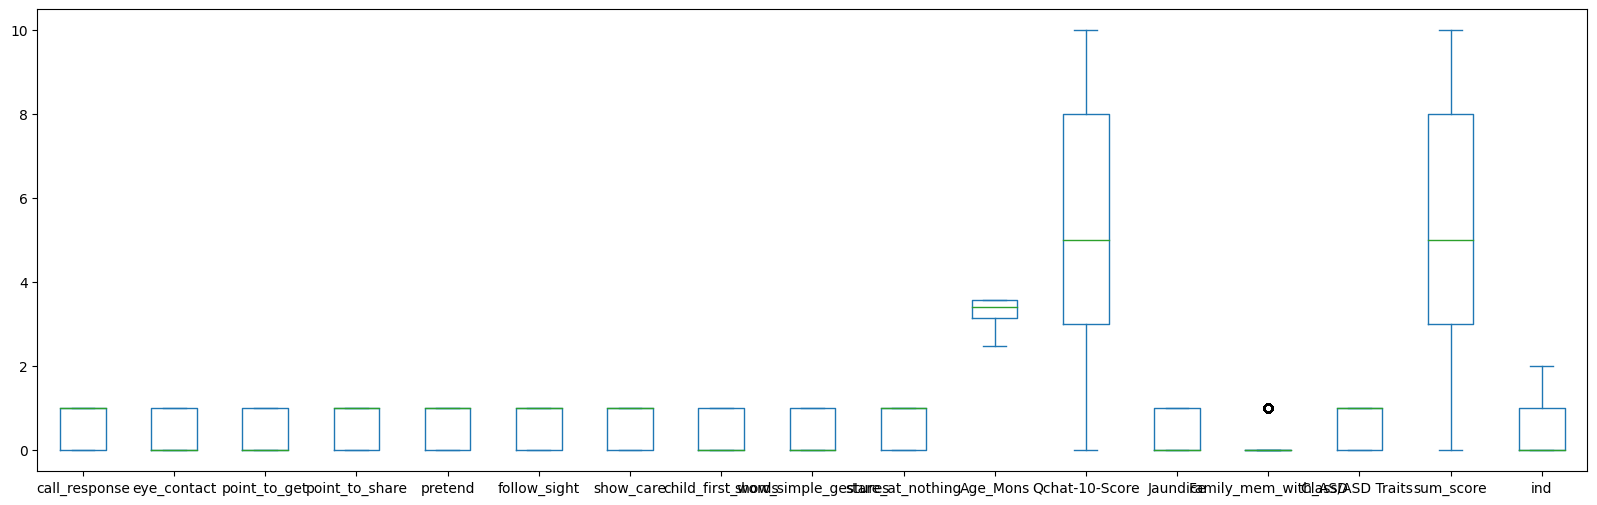

In [227]:
df.plot(kind='box', figsize=(20,6))

<Axes: >

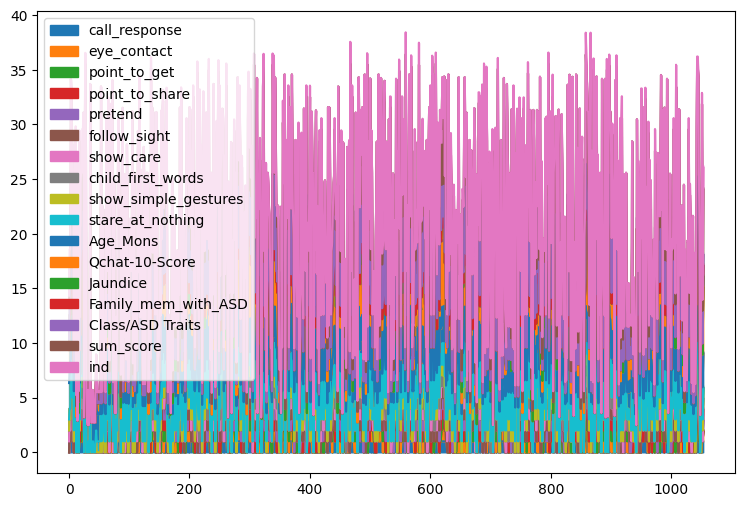

In [228]:
df.plot(kind='area', figsize=(9,6))

<Axes: ylabel='Density'>

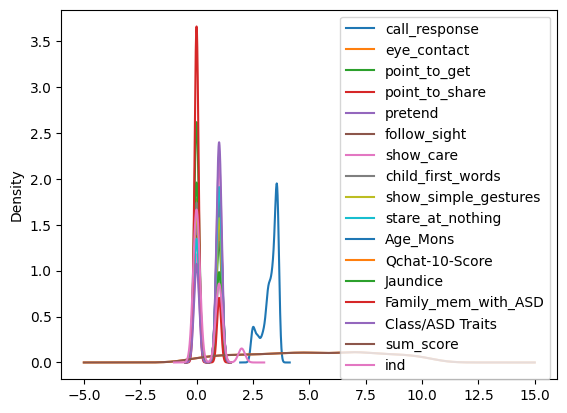

In [229]:
df.plot(kind='kde')#creates visualization for kernal density

<Axes: ylabel='Density'>

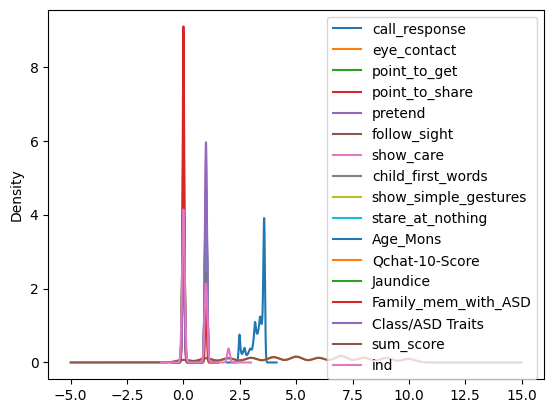

In [230]:
df.plot(kind='kde', bw_method=0.1)#creates visualization for kernal density

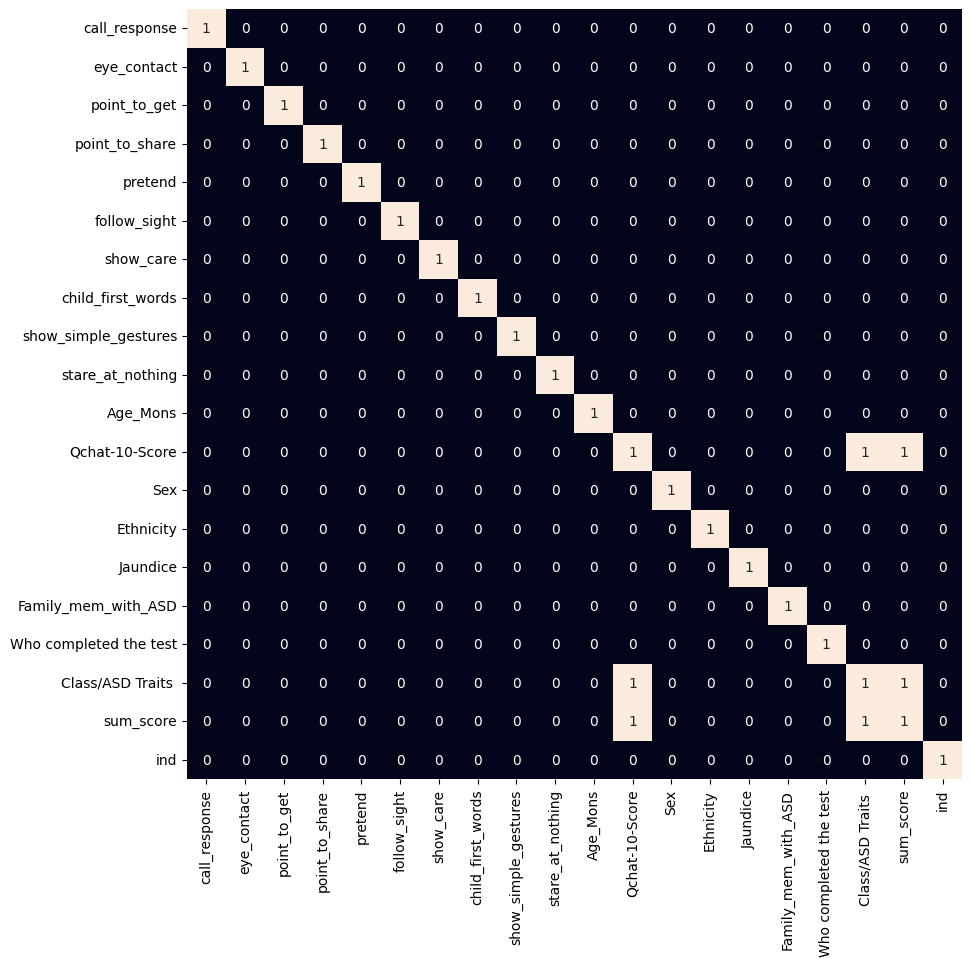

In [231]:
def encode_labels(data):
	for col in data.columns:


	#If the column is not of type int or float, then it is of type object
		if data[col].dtype == 'object':
			le = LabelEncoder()
			data[col] = le.fit_transform(data[col])

	return data

df = encode_labels(df)
#visualizing the correlation matrix via a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [236]:
#Drop columns that are not needed
removal = ['Class/ASD Traits ']
features = df.drop(removal, axis=1)
target = df['Class/ASD Traits ']

#Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

#Oversample the minority class to balance the imbalanced data
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y= ros.fit_resample(X_train, Y_train)

print(X.shape, Y.shape)


(1148, 19) (1148,)


LogisticRegression() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0
SVC() : 
Training Accuracy :  1.0
Validation Accuracy :  0.9792093871041239


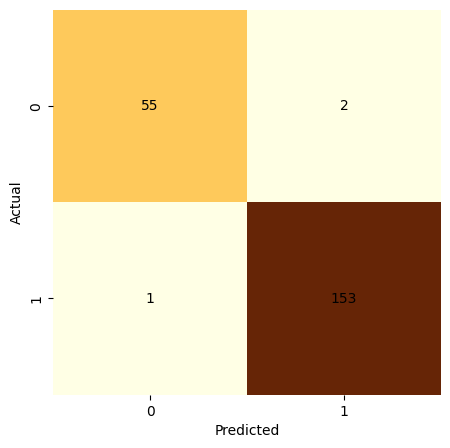

In [253]:
#Features need to be normalized for stability and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
	model.fit(X, Y)

	print(f'{model} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
	print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
#predict on validation set
y_pred = model.predict(X_val)

#create confusion matrix
cm = confusion_matrix(Y_val, y_pred)

#plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='YlOrBr', fmt='g', cbar=False, annot_kws={"color": "black"})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [244]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.0 MB/s eta 0:00:00


In [262]:
#Load the data
df = pd.read_csv("toddler_autism.csv")

#Drop unnecessary columns
df.drop(["Case_No", "Who completed the test"], axis=1, inplace=True)

#Convert categorical variables to numeric
df["Sex"] = df["Sex"].map({"m": 0, "f": 1})
df["Ethnicity"] = df["Ethnicity"].map({"White-European": 0, "Latino": 1, "Others": 2, "Black": 3, "Asian": 4, "Middle Eastern ": 5, "Mixed": 6})
df["Jaundice"] = df["Jaundice"].map({"no": 0, "yes": 1})
df["Family_mem_with_ASD"] = df["Family_mem_with_ASD"].map({"no": 0, "yes": 1})
df["Class/ASD Traits "] = df["Class/ASD Traits "].map({"NO": 0, "YES": 1})

#Split the data into features and target
X = df.drop("Class/ASD Traits ", axis=1)
y = df["Class/ASD Traits "]

#Balance the dataset
ros = RandomOverSampler(random_state=0)

#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

#Create the app
app = Dash(__name__)

#Define the layout
app.layout = html.Div([
    html.H1("ASD Diagnosis Dashboard"),
    html.Div([
        html.Label("Feature: "),
        dcc.Dropdown(
            id="feature-dropdown",
            options=[{"label": col, "value": col} for col in X.columns],
            value="A1"
        )
    ], style={"width": "30%", "display": "inline-block"}),
    html.Div([
        html.Label("Target: "),
        dcc.RadioItems(
            id="target-radio",
            options=[{"label": "ASD Diagnosis", "value": "ASD"}, {"label": "Gender", "value": "Gender"}],
            value="ASD"
        )
    ], style={"width": "30%", "display": "inline-block"}),
    dcc.Graph(id="feature-vs-target")
])

#Define the callbacks
@app.callback(
    Output("feature-vs-target", "figure"),
    [Input("feature-dropdown", "value"), Input("target-radio", "value")]
)
def update_figure(feature, target):
    if target == "ASD":
        fig = px.histogram(df, x=feature, color="Class/ASD Traits ", nbins=20)
    else:
        fig = px.histogram(df, x=feature, color="Sex", nbins=20)
    return fig

#Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on
